In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import mercury as mr # for widgets

# Replace 'file_name.txt' with the name of your txt file

df = pd.read_csv('C:\\Users\\admin\\Documents\\GitHub\\Pyhton_Jupiter\\Data\\Battery\\WinbondTripTest.txt',  header=None, na_values=[''], skipinitialspace=True)
df.dropna(inplace = True)

# Iterate through each column
for col in df.columns:
    Data =df[col].str.split(';', expand=True)

#Data.columns = ['a', 'b']
Data.rename(columns = {0:'Odometer', 1:'Trip', 2:'Speed kmh', 3:'Is in Reverse', 4:'Riding Mode',  5:'MCU Current',  6:'BMS Current', 7:'Vehicle status byte1', 8:'Vehicle status byte2', 9:'Throttle',
                       10:'MCU Temp', 11:'Motor temp', 12:'Pack Voltage',  13: 'BMS Cell Highest Voltage value', 14: 'BMS Cell Lowest Voltage value', 15:'SOC', 16:'RPM', 17:'Avg MOSTFet temp', 18: '12V voltage', 19:'Charger Volt', 20:'Charger Current', 21: 'Num Ative ERROR', 22: 'Sum Active ERROR', 23: 'Input Head light', 23: 'Turn left', 25: 'Turn Right', 26:'Mode Switch', 27: 'Kick Stand', 28: 'Kill switch', 29:'Key', 30:'Brake'}, inplace = True)



## Ploting the Pack voltage
The pack voltage from the BMS 

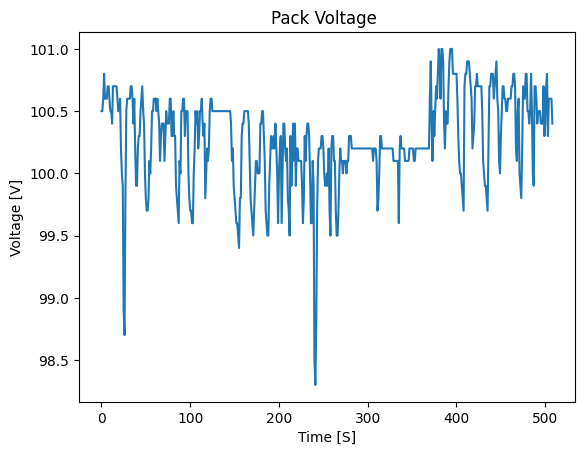

In [9]:
plt.plot(Data['Pack Voltage'].astype(float))
plt.title('Pack Voltage ')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## Ploting the current from the BMS 

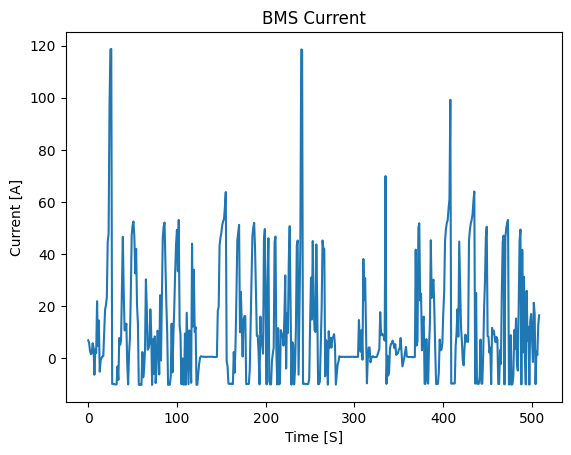

In [23]:
plt.plot(Data['BMS Current'].astype(float))
plt.title('BMS Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()

## Plotting the phase current 

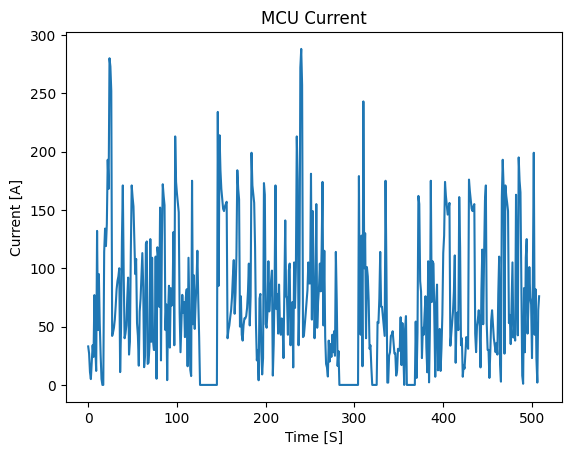

In [24]:
plt.plot(Data['MCU Current'].astype(float))
plt.title('MCU Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()

## Ploting the odometer values
the odometer value is coming wiht some other data such as addresses and time, we first need to split the data and keep the odometer values 


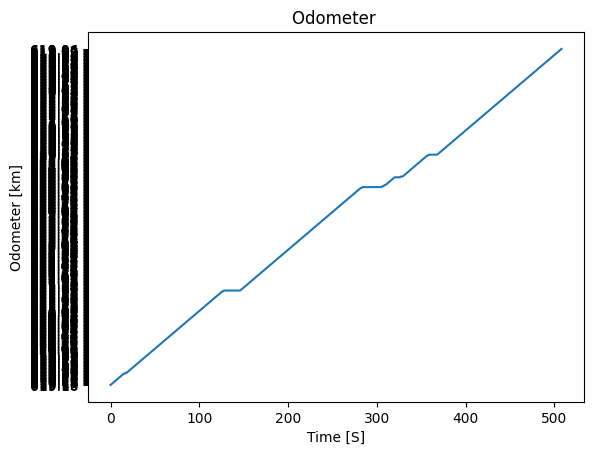

In [4]:
Odometer_val =[]
for col in Data['Odometer']:
    Odometer_val.append(col.split(' ')[2])

plt.plot(Odometer_val)
plt.title('Odometer ')
plt.xlabel('Time [S]')
plt.ylabel('Odometer [km]')
plt.show()

## Speed of the vehicle

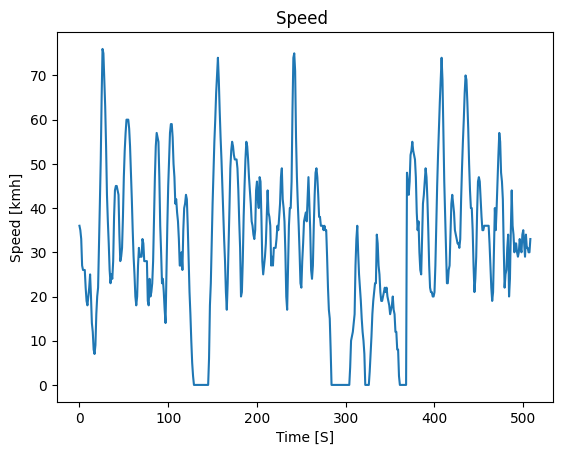

In [5]:
plt.plot(Data['Speed kmh'].astype(float))
plt.title('Speed ')
plt.xlabel('Time [S]')
plt.ylabel('Speed [kmh]')
plt.show()

## The Motor temperature of the vehicle

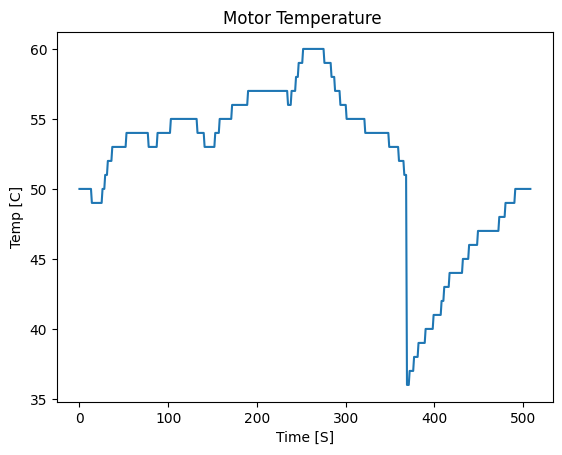

In [10]:
plt.plot(Data['Motor temp'].astype(float))
plt.title('Motor Temperature ')
plt.xlabel('Time [S]')
plt.ylabel('Temp [C]')
plt.show()

## Motor Controller or MCU temperature

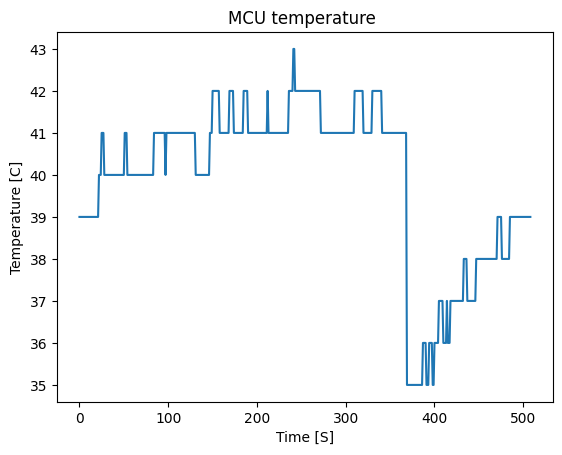

In [11]:
plt.plot(Data['MCU Temp'].astype(float))
plt.title('MCU temperature ')
plt.xlabel('Time [S]')
plt.ylabel('Temperature [C]')
plt.show()

## BMS Cell Highest Voltage value

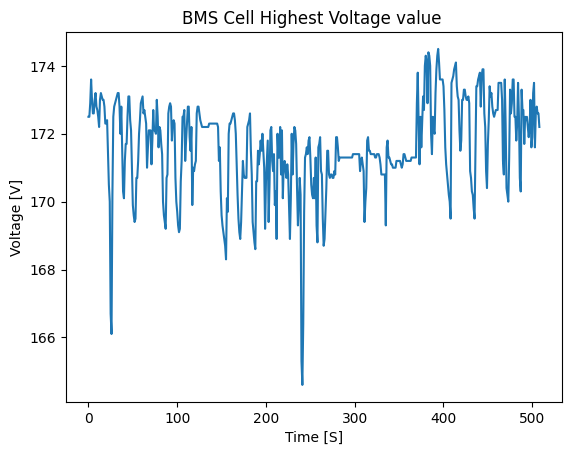

In [12]:
plt.plot(Data['BMS Cell Highest Voltage value'].astype(float))
plt.title('BMS Cell Highest Voltage value ')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## BMS Cell Lowest Voltage value

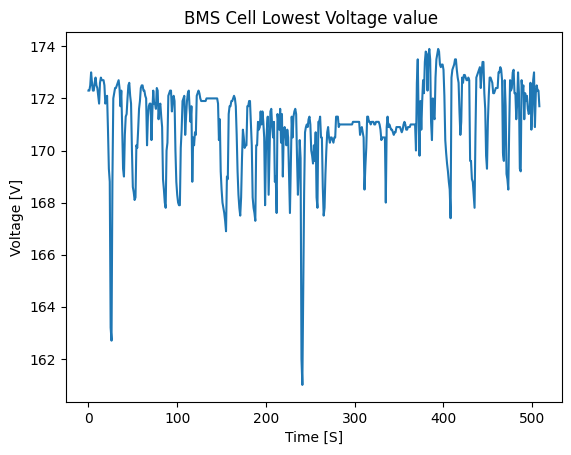

In [13]:
plt.plot(Data['BMS Cell Lowest Voltage value'].astype(float))
plt.title('BMS Cell Lowest Voltage value ')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## Ploting the Pack SOC 

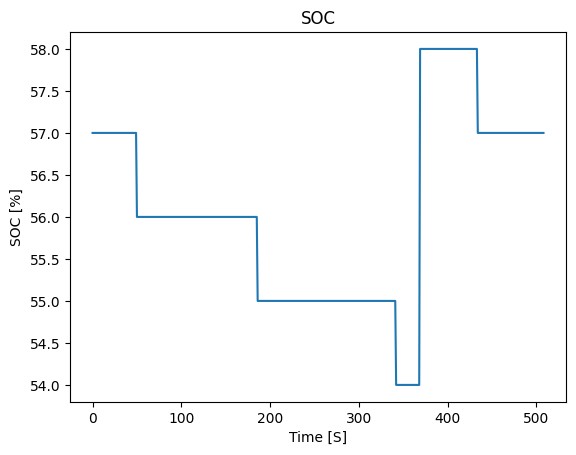

In [14]:
plt.plot(Data['SOC'].astype(float))
plt.title('SOC')
plt.xlabel('Time [S]')
plt.ylabel('SOC [%]')
plt.show()

## Ploting the 12V battery voltage  

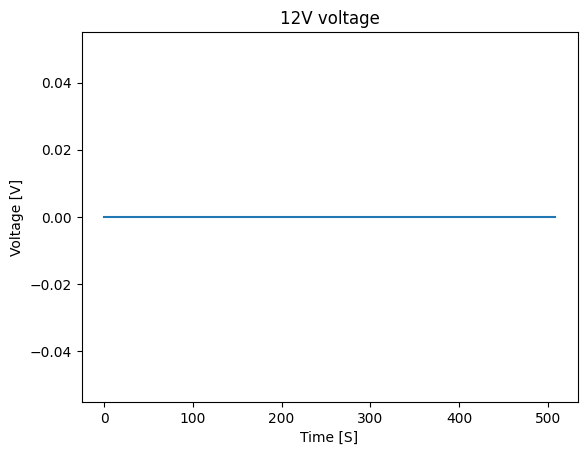

In [15]:
plt.plot(Data['12V voltage'].astype(float)/10)
plt.title('12V voltage')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## Ploting the riding mode of the vehicle
- 1: is the D mode which is the City mode of the URS
- 2: is the Sport mode also called boost mode
- 0: is the  ECO mode


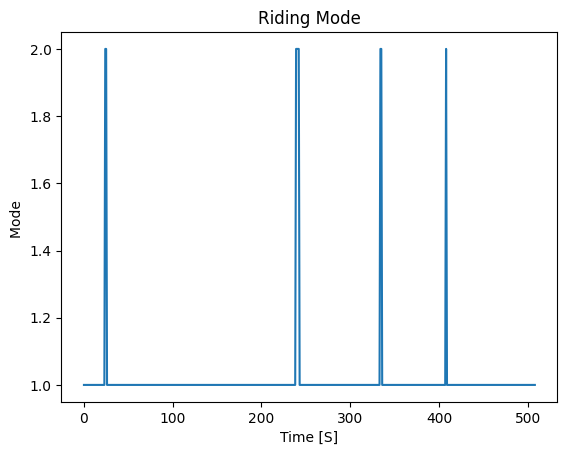

In [16]:
plt.plot(Data['Riding Mode'].astype(float))
plt.title('Riding Mode')
plt.xlabel('Time [S]')
plt.ylabel('Mode ')
plt.show()

## Plotting the brake signal 
- 0 : Is break low
- 1 : Is break High

In [ ]:
plt.plot(Data['Brake'].astype(float))
plt.title('Brake signal')
plt.xlabel('Time [S]')
plt.ylabel('Braking')
plt.show()